In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# tell pandas to show all columns when we display a DataFrame
pd.set_option("display.max_columns", None)

## Allen data preprocessing

Get AllenData sessions

In [2]:
basepath = "E:\Allensdk_data\local\ecephys_cache_dir"
manifest_path = os.path.join(basepath, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

sessions = cache.get_session_table()

Select a session randomly

In [3]:
session_id = 799864342
session = cache.get_session_data(session_id)

print(session.structure_acronyms)
print(session.stimulus_names)

['VISam', nan, 'COAa', 'CA1', 'LP', 'DG', 'VISmma', 'VISp', 'ProS', 'SUB', 'CA3', 'CA2', 'VISl', 'VISal', 'LGd', 'VISrl', 'APN', 'POL']
['spontaneous', 'gabors', 'flashes', 'drifting_gratings', 'natural_movie_three', 'natural_movie_one', 'static_gratings', 'natural_scenes', 'drifting_gratings_contrast']


Select 'drifting_gratings' stimuli with contrast 0.8 and temporal_frequency 15.0, but 8 different orientations. 
Each stimuli was presented 15 times for 2 seconds

In [4]:
stim_table = session.get_stimulus_table('drifting_gratings')
print(stim_table['temporal_frequency'].value_counts())

stim_orientation_table = stim_table[stim_table['temporal_frequency'] == 15.0 ]
print(stim_orientation_table['orientation'].value_counts())
print(stim_orientation_table['stimulus_condition_id'].value_counts())
stim_orientation_table.head()

15.0    120
8.0     120
4.0     120
2.0     120
1.0     120
null     30
Name: temporal_frequency, dtype: int64
270.0    15
45.0     15
315.0    15
90.0     15
135.0    15
180.0    15
225.0    15
0.0      15
Name: orientation, dtype: int64
254    15
252    15
248    15
247    15
277    15
272    15
267    15
256    15
Name: stimulus_condition_id, dtype: int64


,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3799,0.8,135,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1593.313231,2,drifting_gratings,1595.314911,15,2.00168,247
3800,0.8,45,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1596.315739,2,drifting_gratings,1598.317439,15,2.00170,248
3805,0.8,0,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1611.328291,2,drifting_gratings,1613.329971,15,2.00168,252
3807,0.8,90,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1617.333321,2,drifting_gratings,1619.334971,15,2.00165,254
3809,0.8,315,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1623.338331,2,drifting_gratings,1625.340001,15,2.00167,256


Select units from VISam area

In [5]:
units = session.units[session.units["ecephys_structure_acronym"] == 'VISam']
units.tail()

,isi_violations,waveform_amplitude,waveform_spread,waveform_duration,nn_hit_rate,snr,peak_channel_id,cluster_id,waveform_PT_ratio,max_drift,presence_ratio,local_index_unit,waveform_halfwidth,waveform_velocity_below,amplitude_cutoff,cumulative_drift,firing_rate,nn_miss_rate,silhouette_score,d_prime,waveform_recovery_slope,waveform_repolarization_slope,isolation_distance,waveform_velocity_above,L_ratio,c50_dg,area_rf,fano_dg,fano_fl,fano_ns,fano_rf,fano_sg,f1_f0_dg,g_dsi_dg,g_osi_dg,g_osi_sg,azimuth_rf,mod_idx_dg,p_value_rf,pref_sf_sg,pref_tf_dg,run_mod_dg,run_mod_fl,run_mod_ns,run_mod_rf,run_mod_sg,pref_ori_dg,pref_ori_sg,run_pval_dg,run_pval_fl,run_pval_ns,run_pval_rf,run_pval_sg,elevation_rf,pref_image_ns,pref_phase_sg,firing_rate_dg,firing_rate_fl,firing_rate_ns,firing_rate_rf,firing_rate_sg,on_off_ratio_fl,time_to_peak_ns,pref_sf_multi_sg,pref_tf_multi_dg,pref_ori_multi_dg,pref_ori_multi_sg,pref_phase_multi_sg,image_selectivity_ns,pref_image_multi_ns,lifetime_sparseness_dg,lifetime_sparseness_fl,lifetime_sparseness_ns,lifetime_sparseness_rf,lifetime_sparseness_sg,probe_vertical_position,probe_horizontal_position,probe_id,channel_local_index,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
951088360,0.410887,139.764300,100.0,0.576884,0.696552,2.929022,849847958,182,0.525261,42.09,0.99,180,0.206030,0.068677,0.001029,308.39,0.924313,0.001319,0.128805,3.332589,-0.079071,0.404887,37.697099,0.431682,0.038443,NaN,100.0,1.866667,0.906667,2.314161,2.266667,2.424135,1.457576,0.296736,0.276959,0.155414,90.00,9.554418,0.308,0.02,1.0,0.075000,NaN,-0.212500,NaN,0.235880,270.0,0.0,0.887783,NaN,0.371584,NaN,0.794110,-30.00,4914,0.75,0.348404,0.319736,2.488674,0.183115,1.001829,NaN,0.1235,False,False,False,False,False,0.630763,False,0.652296,0.054054,0.485128,0.716741,0.436586,1260,11,805579698,125,394.0,VISam,7400.0,693.0,7626.0,probeA,See electrode locations,29999.960987,1249.998374,True
951088352,0.395023,128.765910,80.0,0.618090,0.759405,2.893276,849847958,181,0.514263,45.26,0.99,179,0.192295,0.480737,0.008770,217.13,2.421813,0.010119,0.079628,2.685456,-0.076417,0.351927,38.979040,0.480737,0.061345,0.017557,800.0,4.346926,1.773333,1.738692,3.766667,2.417037,1.340189,0.312463,0.182511,0.140707,23.75,1.680756,0.179,0.02,1.0,NaN,NaN,0.539642,NaN,0.791713,90.0,0.0,NaN,NaN,0.096645,NaN,0.102413,-23.75,4977,0.50,1.090219,1.651968,2.668020,1.616236,2.565854,NaN,0.1165,False,False,False,False,False,0.717339,False,0.546841,0.546142,0.337414,0.320771,0.173218,1260,11,805579698,125,394.0,VISam,7400.0,693.0,7626.0,probeA,See electrode locations,29999.960987,1249.998374,True
951088345,0.000000,421.607940,70.0,0.576884,0.981982,6.738347,849847958,180,0.410944,22.22,0.96,178,0.151089,0.274707,0.000051,46.52,0.475690,0.000101,0.431229,5.385496,-0.247366,1.304174,87.701378,0.412060,0.000007,NaN,500.0,3.396078,0.920000,2.760995,1.233333,1.165256,1.776417,0.364091,0.381181,0.612922,78.00,0.590909,0.000,0.02,1.0,NaN,NaN,0.511521,-1.000000,-0.164007,315.0,60.0,NaN,NaN,0.026812,0.103891,0.290173,-14.00,4912,0.50,0.095308,0.159868,1.498578,0.064693,0.575519,NaN,0.0825,False,False,False,False,False,0.828407,False,0.643554,1.000000,0.740812,0.869700,0.867615,1260,11,805579698,125,394.0,VISam,7400.0,693.0,7626.0,probeA,See electrode locations,29999.960987,1249.998374,True
951088845,0.467983,54.071355,80.0,0.714238,NaN,1.453889,849847974,247,0.650737,54.79,0.99,245,0.302178,0.961474,0.055222,780.15,0.670874,0.000000,0.055440,NaN,-0.022144,0.101907,NaN,0.206030,NaN,NaN,300.0,3.249612,0.773333,1.213659,1.511111,1.058171,1.509081,0.111325,0.371337,0.395208,60.00,0.077838,0.000,0.02,4.0,0.802083,NaN,0.601810,NaN,0.121447,270.0,90.0,0.042481,NaN,0.004695,NaN,0.765754,-30.00,4996,0.00,0.425180,2.264

Count spikes in 100ms bins after stimuli onset and spaning a total of 2 seconds

In [76]:
print(stim_orientation_table.duration)
time_step = 0.1
time_bins = np.arange(0, 2 + time_step, time_step)
time_bins

stimulus_presentation_id
3799     2.00168
3800     2.00170
3805     2.00168
3807     2.00165
3809     2.00167
          ...   
49396    2.00167
49409    2.00167
49416    2.00166
49421    2.00169
49426    2.00167
Name: duration, Length: 120, dtype: float64


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [77]:
spike_times = session.presentationwise_spike_times(
    stimulus_presentation_ids=stim_orientation_table.index.values,  
    unit_ids=units.index.values
)
a = spike_times.values
print(np.unique(a))
spike_times.value_counts()

[8.76626927e-06 1.24563444e-05 2.07779849e-05 ... 9.51088377e+08
 9.51088476e+08 9.51088845e+08]


stimulus_presentation_id  unit_id    time_since_stimulus_presentation_onset
49426                     951088845  0.276698                                  1
3994                      951088214  0.340321                                  1
                                     1.652556                                  1
                                     1.648622                                  1
                                     1.636722                                  1
                                                                              ..
31199                     951087824  1.786460                                  1
                                     1.779193                                  1
                                     1.770126                                  1
                                     1.756826                                  1
3799                      951087792  0.011377                                  1
Length: 52603, dtype: int64

In [78]:
spike_counts = session.presentationwise_spike_counts(
    stimulus_presentation_ids=stim_orientation_table.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)
print(spike_counts.shape)
print(spike_counts.coords)
spike_counts['stimulus_presentation_id'].values.shape

(120, 20, 29)
Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3799 ... 49426
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 0.05 ... 1.95
  * unit_id                          (unit_id) int64 951087804 ... 951088476


(120,)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18]
(120, 20, 29)
(2400, 29)


Text(0, 0.5, 'spike counts')

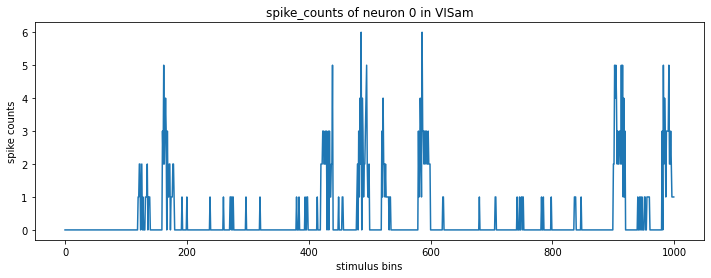

In [79]:
# convert spike_counts structure from stimulus_presentation_id*time_bins* unit_id 
# to stimulus_bins_counts * units, (120, 20, 109) -> (2400, 109)

counts_matrix = spike_counts.values
print(np.unique(counts_matrix))
print(counts_matrix.shape)
VISam_counts = counts_matrix.reshape(counts_matrix.shape[0]*counts_matrix.shape[1], counts_matrix.shape[2])
print(VISam_counts.shape)

plt.figure(figsize=(12, 4))
plt.plot(VISam_counts[:1000, 0])
plt.title('spike_counts of neuron 0 in VISam')
plt.xlabel('stimulus bins')
plt.ylabel('spike counts')

(120,)
[135.0 45.0 0.0 90.0 315.0 225.0 90.0 45.0 270.0 135.0 315.0 315.0 180.0
 135.0 180.0 0.0 180.0 225.0 180.0 315.0 45.0 90.0 315.0 180.0 90.0 45.0
 90.0 225.0 0.0 90.0 45.0 180.0 180.0 315.0 315.0 315.0 45.0 225.0 45.0
 225.0 0.0 225.0 135.0 315.0 0.0 90.0 180.0 90.0 315.0 270.0 135.0 315.0
 225.0 90.0 225.0 225.0 180.0 270.0 180.0 180.0 135.0 0.0 315.0 45.0 45.0
 270.0 90.0 90.0 135.0 225.0 90.0 270.0 0.0 45.0 0.0 45.0 135.0 180.0 45.0
 270.0 0.0 225.0 45.0 135.0 225.0 315.0 0.0 270.0 270.0 90.0 225.0 270.0
 270.0 135.0 45.0 270.0 90.0 0.0 135.0 225.0 270.0 135.0 0.0 0.0 270.0
 180.0 90.0 315.0 0.0 315.0 135.0 45.0 270.0 135.0 225.0 135.0 180.0 270.0
 180.0 0.0]
(2400,)
[135.0 135.0 135.0 ... 0.0 0.0 0.0]


Text(0, 0.5, 'orientations')

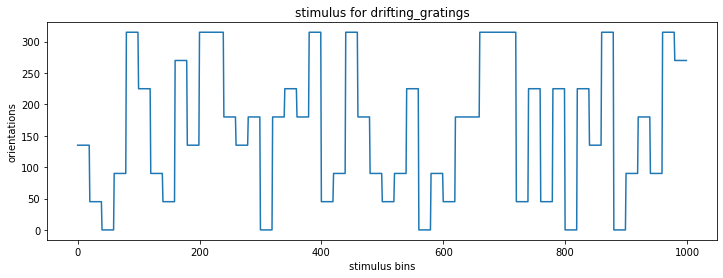

In [80]:
# get the stimuli array orientation (15*8)*20

orient_array = stim_orientation_table.loc[
    spike_counts['stimulus_presentation_id'].values, 'orientation']
print(orient_array.shape)
print(orient_array.values)
stim_orient = np.repeat(orient_array.values, counts_matrix.shape[1])
print(stim_orient.shape)
print(stim_orient)

plt.figure(figsize=(12, 4))
plt.plot(stim_orient[:1000])
plt.title('stimulus for drifting_gratings')
plt.xlabel('stimulus bins')
plt.ylabel('orientations')

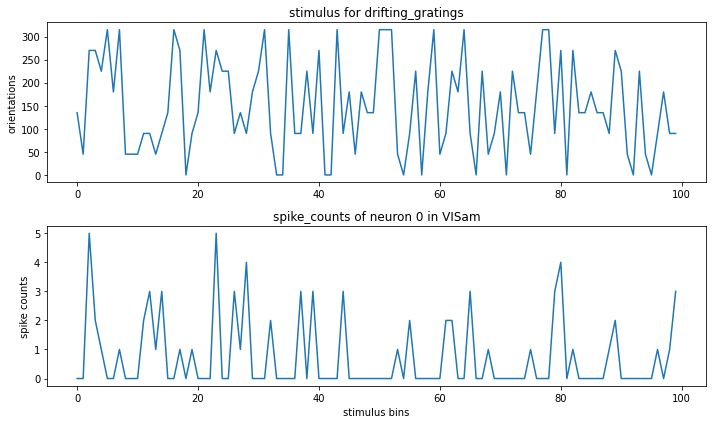

In [81]:
np.random.seed(2022)
inds = np.random.permutation(np.arange(len(stim_orient)))
stim_orient = stim_orient[inds]
VISam_counts = VISam_counts[inds, :]

# put stimulus and spike_counts together
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))

ax1.plot(stim_orient[:100])
ax1.set_title('stimulus for drifting_gratings')
# ax1.set_xlabel('stimulus bins')
ax1.set_ylabel('orientations')

ax2.plot(VISam_counts[:100, 0])
ax2.set_title('spike_counts of neuron 0 in VISam')
ax2.set_xlabel('stimulus bins')
ax2.set_ylabel('spike counts')

plt.tight_layout()

## Construct GLM model

- Create the complete design matrix
- Obtain the MLE weights ($\boldsymbol{\hat \theta}$)
- Compute $\mathbf{\hat y} = \mathbf{X}\boldsymbol{\hat \theta}$

Create design matrix X using d = 50 time lags 

(2400, 50)


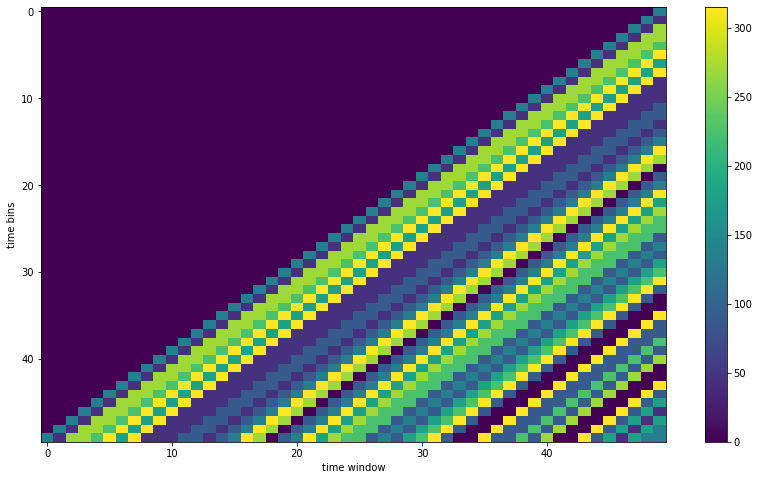

In [82]:
def design_matrix(stim, d=20):
    """design_matrix 

    Create time-lag design matrix from stimulus intensity vector.

    Arguments:
        stim -- Stimulus intensity at each time point.

    Keyword Arguments:
        d -- Number of time lags to use. (default: {20})
    """

    padded_stim = np.concatenate([np.zeros(d - 1), stim])
    design_mat = np.zeros((len(stim), d))

    for i in np.arange(len(stim)):
        design_mat[i] = padded_stim[i : i + d]

    return design_mat

d = 50
design_mat_ori = design_matrix(stim_orient, d=d)
print(design_mat_ori.shape)

plt.figure(figsize=[14,8])
plt.imshow(design_mat_ori[:50], aspect='auto', interpolation='nearest')
plt.xlabel('time window')
plt.ylabel('time bins')
plt.colorbar()
plt.show()

Filter for GLM

The maximum likelihood estimate of $\theta$ in this model can be solved analytically using the equation:
\begin{align}
\boldsymbol{\hat \theta} = (\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}^{\top}\mathbf{y}
\end{align}

<Figure size 432x288 with 0 Axes>

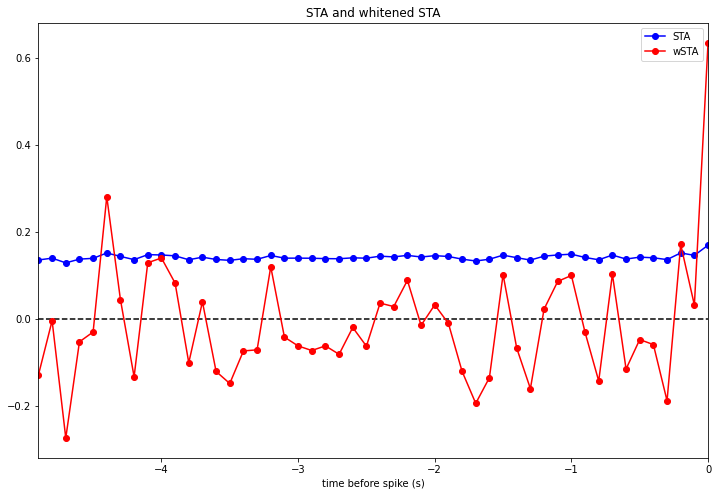

In [85]:
neuron_spike = VISam_counts[:, 0]
design_mat_offset = np.column_stack((np.ones_like(neuron_spike), design_mat_ori))

sta = (design_mat_offset.T @ neuron_spike)/np.sum(neuron_spike)

wsta = np.linalg.inv(design_mat_offset.T @ design_mat_offset) @ sta * np.sum(neuron_spike)

### Plot it
ttk = np.arange(- d + 1, 1) * time_step  # time bins for STA (in seconds)
plt.clf()
plt.figure(figsize=[12,8])
plt.plot(ttk,ttk*0, 'k--')
plt.plot(ttk, sta[1:]/np.linalg.norm(sta[1:]), 'bo-', label="STA")
plt.plot(ttk, wsta[1:]/np.linalg.norm(wsta[1:]), 'ro-', label="wSTA")
plt.legend()
plt.title('STA and whitened STA')
plt.xlabel('time before spike (s)')
plt.xlim([ttk[0],ttk[-1]])
plt.show()

Predicting spiking with GLM

Compute $\mathbf{\hat y} = \mathbf{X}\boldsymbol{\hat \theta}$

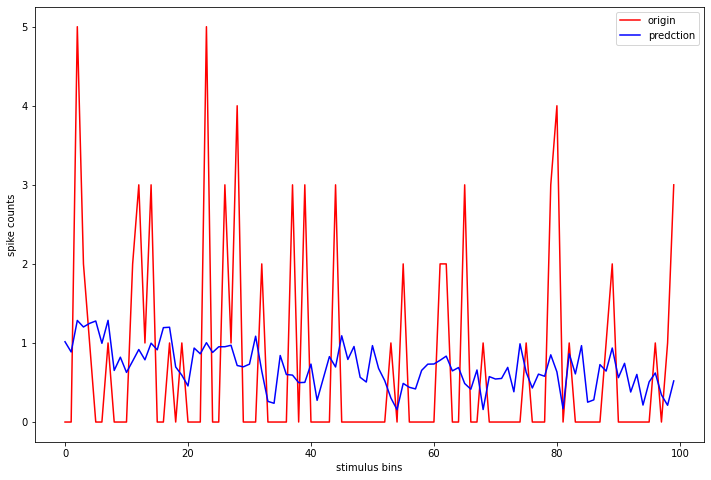

In [87]:
pred_spike = design_mat_offset @ wsta

plt.figure(figsize=[12, 8])
plt.plot(neuron_spike[:100], color='red', label='origin')
plt.plot(pred_spike[:100], color='blue', label='predction')
plt.xlabel('stimulus bins')
plt.ylabel('spike counts')
plt.legend()
plt.show()

Possion GLM

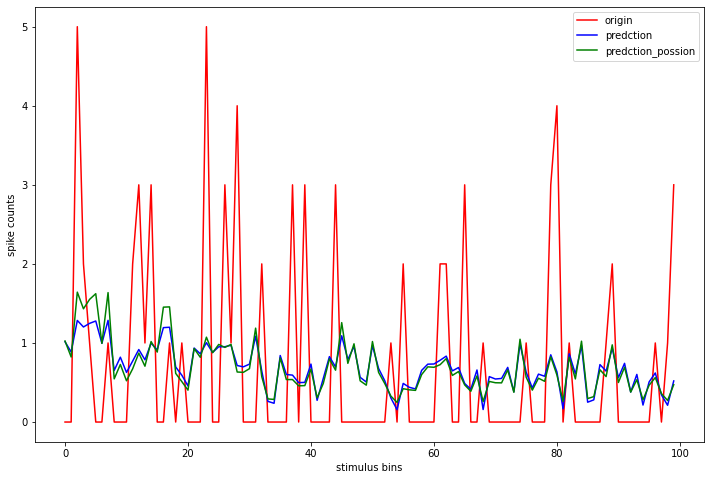

In [89]:
import statsmodels.api as sm

glm_possion = sm.GLM(endog=neuron_spike, exog=design_mat_offset, family=sm.families.Poisson())
spike_possion_fit = glm_possion.fit(ax_iter=100, tol=1e-6, tol_criterion='params')
p_GLM_filter = spike_possion_fit.params
pred_spike_possion = np.exp(design_mat_offset @ p_GLM_filter)

plt.figure(figsize=[12, 8])
plt.plot(neuron_spike[:100], color='red', label='origin')
plt.plot(pred_spike[:100], color='blue', label='predction')
plt.plot(pred_spike_possion[:100], color='green', label='predction_possion')
plt.legend()
plt.xlabel('stimulus bins')
plt.ylabel('spike counts')
plt.show()